# SVM (Support Vector Machine) - recitation

``
In this short excersice, you will experience with implementing svm classifier for 2D points, in the linear case and with kernel method.
It may give you a basic understanding about the model and it's limits, and above all, about how it works.
``

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from tqdm import tqdm

%matplotlib inline

## Implementation of SVM

```If you remember, SVM (without regularization) is defined as follow:```

For dataset $X$ of $n$ vectors with dimension $k$ ($X$ has shape of $(n,k)$) and labels $Y$ (with values $\pm1$) :

We want to find a vector $w$ (of dimension $k$) and a number $b$, such that:

$$\sum_{j=1}^{k} w_j X_{ij} - b > 1 \Longrightarrow Y_i = 1$$
$$\sum_{j=1}^{k} w_j X_{ij} - b < -1 \Longrightarrow Y_i = -1$$

$w$ and $b$ are parameters of some plane (in 2D a plane is a line), that separate the space into 2 parts:
- one is where all the points x give $\sum_{j=1}^{k} w_j x_j - b \geq 0$
- one is where all the points x give $\sum_{j=1}^{k} w_j x_j - b < 0$

The rational is that by finding $w$ and $b$ that separate our points such that on one side the points with Y=+1, and on the other side the Y=-1, we could predict y for some new x, by taking $Y=sign(\sum_{j=1}^{k} w_j x_j - b)$

``The loss function that will punish us when `` $w$ `` and `` $b$ `` do not "follow the rules", is:``
$$Loss(w,b)=\frac{1}{n} \sum_{i=1}^{n} \max\{0, 1 - Y_i \cdot (\sum_{j=1}^{k} w_j X_{ij} - b)\}$$

``We see that if `` $(\sum_{j=1}^{k} w_j X_{ij} - b)$ `` and `` $Y_i$ `` has different signs the loss increase, and decrease otherwise.``

```Like the Linear and Logistic Regression, this problem can be solved by using Gradient Descent.
The derivatives of the loss are:```

$$\frac{dL(w,b)}{dw_j}=\frac{1}{n}\sum_{i=1}^{n}
\begin{cases}
    0 \hspace{1.5cm} , \hspace{0.5cm} \text{if} \hspace{0.4cm} Y_i \cdot (\sum_{j=1}^{k} w_j X_{ij} - b) > 1 \\ 
    - Y_i \cdot X_{ij} \hspace{0.1cm} , \hspace{0.5cm} \hspace{0.4cm} otherwise
\end{cases}$$

$$\frac{dL(w,b)}{db}=\frac{1}{n}\sum_{i=1}^{n}
\begin{cases}
    0 \hspace{1.7cm} , \hspace{0.5cm} \text{if} \hspace{0.4cm} Y_i \cdot (\sum_{j=1}^{k} w_j X_{ij} - b) > 1 \\ 
    Y_i \hspace{1.5cm} , \hspace{0.5cm} \hspace{0.4cm} otherwise
\end{cases}$$

```
And do gradient steps with it:
```

$$b_{l+1} = b_{l} - \alpha \frac{dL(w_l,b_l)}{db}, \hspace{1cm} w_{l+1} = w_{l} - \alpha \frac{dL(w_l,b_l)}{dw}$$

($\alpha$ = learning rate)

In [68]:
def predict(X, w, b):
    """
    X - is the data matrix with shape (n,k).
    w - is the separation vector with shape (k,).
    b - is a number.
    """
    
    ## is the same as [sum(X[i,j]*w[j])-b for i in range(n)]
    return np.matmul(X, w) - b

def linear_svm(X, Y, w_current=None, b_current=0, epochs=1000, learning_rate=0.1):
    
    Y = Y*2 - 1
    N,K = X.shape
    
    if w_current is None:
        w_current = np.ones(K) ## K is the number of features
    
    for _ in tqdm(range(epochs)):
        cost = (1/N) * np.sum(np.maximum(0, 1-Y*predict(X, w_current, b_current)))

        y_current = predict(X, w_current, b_current) # the value of (sum(x[j]*w[j]) - b) for every x in X
        
        # Calculate Gradient
        idx_for_gradient = y_current*Y <= 1
        w_gradient = (1/N) * np.sum(-(X.T*Y).T[idx_for_gradient], axis=0) # Derivative with respect to w
        
        b_gradient = (1/N) * np.sum(Y[idx_for_gradient]) # Derivative with respect to b
        
        # Make one GD step
        w_current -=  learning_rate * w_gradient
        b_current -= learning_rate * b_gradient
    
    return w_current, b_current

In [69]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (10., 7.)
    
    pos = y == 1
    neg = y == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos,0], X[pos,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg,0], X[neg,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

## Part 1 - Linear svm

```In this part we will see how to use SVM to find linear separation between data points.```

In [70]:
#The data can be found in: https://drive.google.com/open?id=15x87LPzpCR8zExvq3q97i279OUbAy5ta
df = pd.read_csv('svm_dataset1.csv')

X = df[['x1', 'x2']].values
Y = df['label'].values

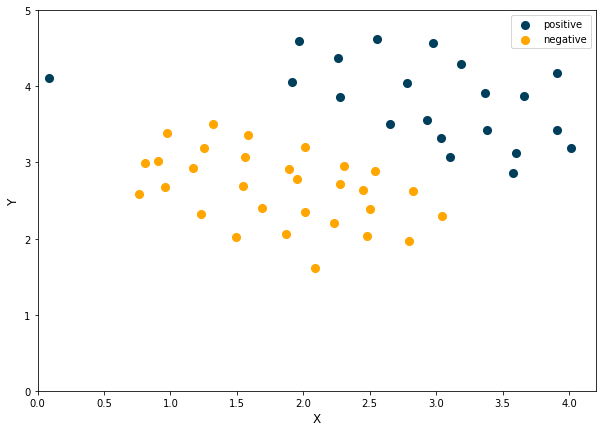

In [71]:
plot_data(X, Y, 'X', 'Y', 'positive', 'negative', 0, 4.2, 0, 5)

```First we will find the``` $w$ ```and``` $b$ ```of the separator:```

In [72]:
w, b = linear_svm(X, Y)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12692.28it/s]


Plot the hyper plane:

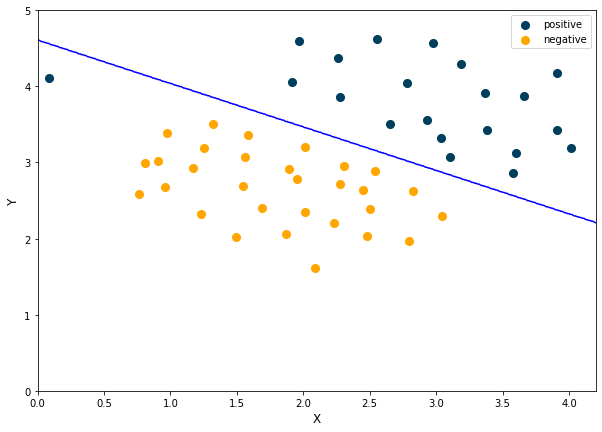

In [73]:
## create a grid of points
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
grid_points = np.c_[x_1.ravel(), x_2.ravel()]

## predict the y value of every point in the grid
Z = np.sign(predict(grid_points, w, b))
Z = Z.reshape(x_1.shape)

## plot the line where te y switch from +1 to -1
plot_data(X, Y, 'X', 'Y', 'positive', 'negative', 0, 4.2, 0, 5)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## Part 2 - kernel SVM

```In this part we will see how to use SVM to find non-linear separation between data points.```

In [74]:
#The data can be found in: https://drive.google.com/open?id=1U8BewAYhmie4MD4t2zpXnQvy0T2l5-b5
df = pd.read_csv('svm_dataset2.csv')

X = df[['x1', 'x2']].values
Y = df['label'].values

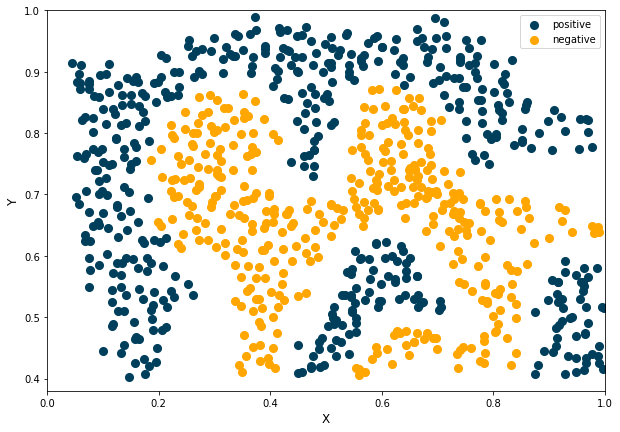

In [75]:
plot_data(X, Y, 'X', 'Y', 'positive', 'negative', 0, 1.0, 0.38, 1)

``How can we seperate thses points with a straight line?``

``The solution is that for every point x, we are going to add a lot of features. With those features the point are now have more dimensions then 2, and we can search linear separation in the high dimention.``

The way we do it with Kernel method, is by choosing dataset $X_2$ of $n$ points, and add features to our dataset X by:
- ``Choosing a distance measure distance(x1, x2). In our case the "gaussian kernel" or "rbf").``
- ``For every point x in X, we compute the distance for every point x_2 in X_2.``

Now for every point $x$ in $X$ we have $n$ features instead of 2. ($x_{new} = \{dist(x, X_2[1]),...,dist(x, X_2[n])\}$)

``The gaussian kernel is defined as:``
$$K_{distance}(x1, x2)=exp(\frac{\sum (x1_j \cdot x2_j)^2}{2 \cdot \sigma^2})$$
Where $\sigma$ is a parameter chosen by us (for now it will be 0.1).

($exp(a)=e^{a}$)

```Usually ``` $X_2$ ``` is the training data. The rational is that we want to "linearly separate" points that close to training points with Y=+1, from points that close to training points with Y=-1```

In [76]:
def gaussian_kernel_function(X, X2, sigma=0.1):
    """
    X  - the data matrix (with shape (N,k)) that we want to traint with, or predict on
    X2 - the data matrix (with shape (N2,k)) that we want to use as features.
    """
    
    N, N2 = len(X), len(X2)
    
    distances = np.zeros((N, N2))
    
    for i in range(N):
        for j in range(N2):
            d = np.linalg.norm(X[i] - X2[j])**2
            distances[i,j] = np.exp(-d/(2*sigma**2))
    
    return distances

We want to train on our $X$, and the features dataset for the kernel will also be $X$:

In [77]:
sigma = 0.1
kernel = gaussian_kernel_function(X, X, sigma)
w, b = linear_svm(kernel, Y)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.25it/s]


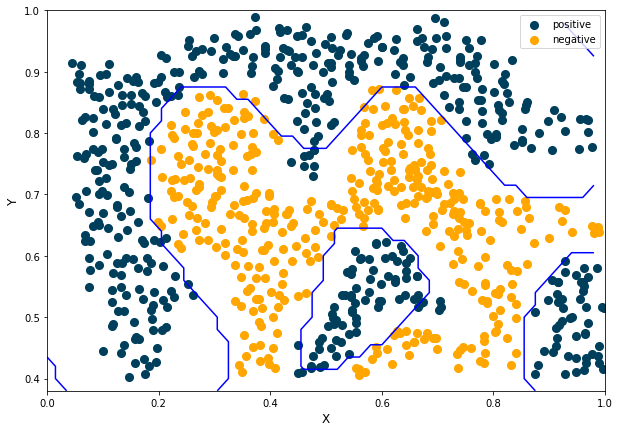

In [78]:
x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.02), np.arange(0.38, 1.0, 0.02))
grid_points = np.c_[x_1.ravel(), x_2.ravel()]

grid_kernel = gaussian_kernel_function(grid_points, X) # calculate the features for the points of the grid
Z = np.sign(predict(grid_kernel, w, b)) # predict on the features of the grid
Z = Z.reshape(x_1.shape)

plot_data(X, Y, 'X', 'Y', 'positive', 'negative', 0, 1, 0.38, 1)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# Bonus - regularized SVM

```Change "linear_svm" to support regularization according to the regularized Loss function:```

$$Loss(w,b)= \sum_{i=1}^{n} \max\{0, 1 - Y_i \cdot (\sum_{j=1}^{k} w_j X_{ij} - b)\} + \frac{\lambda}{2}\sum_{j=1}^{k} w_j^2$$

```Where ``` $\lambda$ ``` is the regularization parameter```

In [86]:
def regularized_linear_svm(X, Y, lamda=1.0, w_current=None, b_current=0, epochs=1000, learning_rate=0.1):
    
    Y = Y*2 - 1
    N,K = X.shape
    
    if w_current is None:
        w_current = np.ones(K) ## K is the number of features
    
    for _ in tqdm(range(epochs)):
        cost = (1/N) * np.sum(np.maximum(0, 1-Y*predict(X, w_current, b_current))) + (lamda/2)*np.sum(w_current**2)

        y_current = predict(X, w_current, b_current) # the value of (sum(x[j]*w[j]) - b) for every x in X
        
        # Calculate Gradient
        idx_for_gradient = y_current*Y <= 1
        
        # Derivative with respect to w
        w_gradient = (1/N) * np.sum(-(X.T*Y).T[idx_for_gradient], axis=0) + lamda*np.sum(w_current)
        
        b_gradient = (1/N) * np.sum(Y[idx_for_gradient]) # Derivative with respect to b
        
        # Make one GD step
        w_current -=  learning_rate * w_gradient
        b_current -= learning_rate * b_gradient
    
    return w_current, b_current

In [87]:
df = pd.read_csv('svm_dataset1.csv')

X = df[['x1', 'x2']].values
Y = df['label'].values

```Plot the comparison between the regularized w and the regular one:```

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 13549.42it/s]
c:\users\jeremy\documents\coursemaphat\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  app.launch_new_instance()
c:\users\jeremy\documents\coursemaphat\venv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


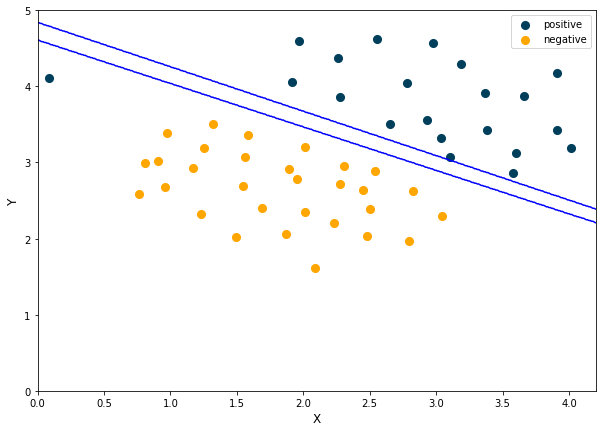

In [89]:
w_r, b_r = regularized_linear_svm(X, Y, lamda=0.3)
w, b = linear_svm(X, Y)
## create a grid of points
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
grid_points = np.c_[x_1.ravel(), x_2.ravel()]

## predict the y value of every point in the grid
Z_r = np.sign(predict(grid_points, w_r, b_r))
Z_r= Z_r.reshape(x_1.shape)

Z = np.sign(predict(grid_points, w, b))
Z= Z.reshape(x_1.shape)

## plot the line where te y switch from +1 to -1
plot_data(X, Y, 'X', 'Y', 'positive', 'negative', 0, 4.2, 0, 5)
plt.contour(x_1, x_2, Z, [0.5], colors='b', label="no regularization")
plt.contour(x_1, x_2, Z_r, [0.5], colors='b', label="regularization")

plt.legend()